<a href="https://colab.research.google.com/github/EstebanPerez25/Proyecto-Final-IDM/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

### Libraries

In [ ]:
#%pip install category_encoders

In [1]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler


## Load data

In [2]:
%load_ext kedro.ipython

[06/01/25 01:57:25] INFO     Using 'c:\Users\Esteban\Documents\. Clases_Tec\8. Octavo               __init__.py:272
                             semestre\_Proyecto\kProject\tcaproject\.venv\Lib\site-packages\kedro\f                
                             ramework\project\rich_logging.yml' as logging configuration.                          

                    INFO     Registered line magic '%reload_kedro'                                   __init__.py:63

                    INFO     Registered line magic '%load_node'                                      __init__.py:65

                    INFO     Resolved project path as: c:\Users\Esteban\Documents\. Clases_Tec\8.   __init__.py:180
                             Octavo semestre\_Proyecto\kProject\tcaproject.                                        
                             To set a different path, run '%reload_kedro <project_root>'                           

[06/01/25 01:57:28] WARNING  c:\Users\Esteban\Documents\. Clases_Tec\8. Octavo                      ]8;id=364515;file://C:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=314737;file://C:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\warnings.py#109\109]8;;\
                             semestre\_Proyecto\kProject\tcaproject\.venv\Lib\site-packages\mlflow\                
                             pyfunc\utils\data_validation.py:186: UserWarning: [33mAdd type hints                  
                             to the `predict` method to enable data validation and automatic                       
                             signature inference during model logging. Check                                       
                             https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage                
                             -in-pythonmodel for more details.[0m                                                  
                               color_warning(                                                                      
                                                                                                                   

                    INFO     Registering new custom resolver: 'km.random_name'                    mlflow_hook.py:65

                    WARNING  No 'mlflow.yml' config file found in environment. Default            mlflow_hook.py:78
                             configuration will be used. Use ``kedro mlflow init`` command in CLI                  
                             to customize the configuration.                                                       

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            kedro_mlflow_config.py:293
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///C:/Users/Esteban/Documents/.%20Clases_Tec/8.%20Oct                           
                             avo%20semestre/_Proyecto/kProject/tcaproject/mlruns'                                  

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving plugin.py:233
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[06/01/25 01:57:30] INFO     Kedro project tcaProject                                               __init__.py:146

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:147
                             'pipelines'                                                                           

[06/01/25 01:57:31] INFO     Registered line magic 'run_viz'                                        __init__.py:153

In [18]:
# Reload
%reload_kedro

[01/06/2025 02:03:26 a. m.] INFO     Resolved project path as: C:\Users\Esteban\Documents\.         __init__.py:180
                                     Clases_Tec\8. Octavo semestre\_Proyecto\kProject\tcaproject.                  
                                     To set a different path, run '%reload_kedro <project_root>'                   

[01/06/2025 02:03:27 a. m.] INFO     Registering new custom resolver: 'km.random_name'            mlflow_hook.py:65

                            WARNING  No 'mlflow.yml' config file found in environment. Default    mlflow_hook.py:78
                                     configuration will be used. Use ``kedro mlflow init``                         
                                     command in CLI to customize the configuration.                                

                            INFO     Kedro is sending anonymous usage data with the sole purpose of   plugin.py:233
                                     improving the product. No personal data or IP addresses are                   
                                     stored on our side. If you want to opt out, set the                           
                                     `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment                       
                                     variables, or create a `.telemetry` file in the current working               
                                     directory with the contents `consent: false`. Read more at                    
                                     https://docs.kedro.org/en/stable/configuration/telemetry.html                 

[01/06/2025 02:03:45 a. m.] DEBUG    Failed to send data to Heap. Exception of type 'ReadTimeout' was plugin.py:341
                                     raised.                                                                       

                            INFO     Kedro project tcaProject                                       __init__.py:146

                            INFO     Defined global variable 'context', 'session', 'catalog' and    __init__.py:147
                                     'pipelines'                                                                   

                            INFO     Registered line magic 'run_viz'                                __init__.py:153

In [20]:
catalog.load("reservaciones_features").cancelacion.value_counts()

[01/06/2025 02:03:57 a. m.] INFO     Loading data from reservaciones_features                   data_catalog.py:403
                                     (ParquetDataset)...                                                           


cancelacion
False    169194
True      33297
Name: count, dtype: int64

In [5]:
df_fe = catalog.load("reservaciones_cleaned")  # type: ignore # noqa: F821

numeric_columns = df_fe.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_fe.select_dtypes(include=['object']).columns
bool_columns = df_fe.select_dtypes(include=['bool']).columns
date_columns = df_fe.select_dtypes(include=['datetime64[ns]']).columns

df_fe.head()

[01/06/2025 01:58:23 a. m.] INFO     Loading data from reservaciones_cleaned                    data_catalog.py:403
                                     (ParquetDataset)...                                                           

,id_reservaciones,fecha_hoy,fecha_reservacion,fecha_llegada,fecha_salida,numero_personas,numero_personas_anio_anterior,numero_adultos,numero_adultos_anio_anterior,numero_menores,...,nombre_estatus_reservacion,clave_estado,nombre_estado,total_tarifa,id_moneda,fecha_ultimo_cambio,reservacion,reservacion_anio_anterior,id_cliente_disp,cliente_disp_anio_anterior
0,0,2019-08-16,2019-08-16,2019-07-11,2019-10-11,2,0,2,0,0,...,Salida,Emx,México,2659.98,1,2019-10-11,True,False,2,0
1,1,2019-10-22,2019-10-22,2019-01-12,2019-05-12,4,0,4,0,0,...,Salida,Egt,Guanajuato,1764.00,1,2019-05-12,True,False,4,0
2,2,2019-10-28,2019-10-28,2019-01-12,2019-05-12,2,0,2,0,0,...,Salida,Emc,Michoacán,2660.04,1,2019-05-12,True,False,2,0
3,3,2019-10-28,2019-10-28,2019-08-12,2019-11-12,4,0,3,0,0,...,Salida,Egt,Guanajuato,1995.03,1,2019-11-12,True,False,3,0
4,4,2019-10-28,2019-10-28,2019-08-12,2019-12-12,2,0,2,0,0,...,Salida,Emx,México,13369.92,1,2019-12-12,True,False,2,0


In [5]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202491 entries, 0 to 203001
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   id_reservaciones                  202491 non-null  int64         
 1   fecha_hoy                         202491 non-null  datetime64[ns]
 2   fecha_reservacion                 202491 non-null  datetime64[ns]
 3   fecha_llegada                     202491 non-null  datetime64[ns]
 4   fecha_salida                      202491 non-null  datetime64[ns]
 5   numero_personas                   202491 non-null  int64         
 6   numero_personas_anio_anterior     202491 non-null  int64         
 7   numero_adultos                    202491 non-null  int64         
 8   numero_adultos_anio_anterior      202491 non-null  int64         
 9   numero_menores                    202491 non-null  int64         
 10  numero_menores_anio_anterior      202

## Feature engineering

### Target Variable: cancelacion

* True: The reservation status is cancelled
* False: Otherwise

In [6]:
df_fe["nombre_estatus_reservacion"].value_counts()


nombre_estatus_reservacion
Salida                       131069
Reservacion Cancelada         33297
Rooming List                  18380
Reservacion O (R)Registro     17153
No Show                        1852
Reservacion En Transicion       586
En Casa (Registro)              130
Preregistro                      24
Name: count, dtype: int64

In [10]:
df_fe['cancelacion'] = df_fe['nombre_estatus_reservacion'].apply(lambda x: True if x == 'Reservacion Cancelada' else False)

In [ ]:
df_fe['cancelacion'].value_counts()


cancelacion
False    169194
True      33297
Name: count, dtype: int64

### Days in advance

Days between `fecha_reservacion` y `fecha_llegada`

In [12]:
df_fe['dias_anticipacion'] = (df_fe['fecha_llegada'] - df_fe['fecha_reservacion']).dt.days

In [13]:
df_fe.dias_anticipacion.describe()


count    202491.000000
mean         65.394961
std         137.692265
min        -334.000000
25%           0.000000
50%          49.000000
75%         141.000000
max         740.000000
Name: dias_anticipacion, dtype: float64

In [14]:
df_fe[df_fe["dias_anticipacion"] < 0].shape

(42800, 51)

6.60652572213086
(29269,)


<Axes: >

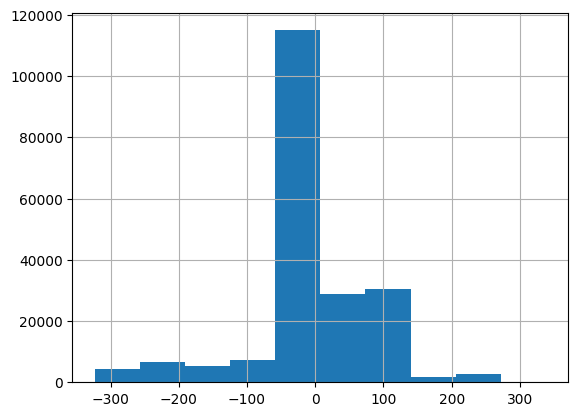

In [15]:
import numpy as np
x = pd.Series((df_fe["fecha_salida"] - df_fe["fecha_llegada"]).dt.days)
print(np.mean(x))
print(x[x<0].shape)
((df_fe["fecha_salida"] - df_fe["fecha_llegada"]).dt.days).hist()

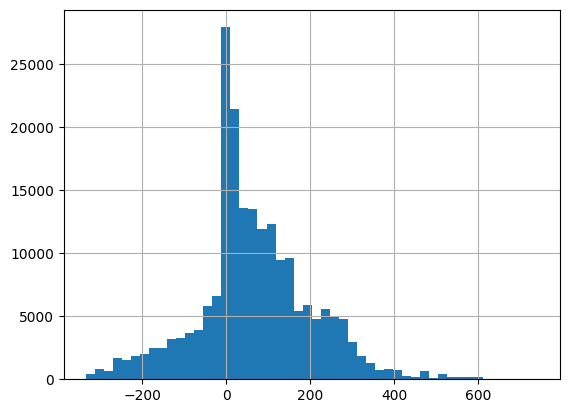

In [16]:
df_fe.dias_anticipacion.hist(bins=50);

**Encodings**

**Description of categorical variables**

In [17]:
df_fe[categorical_columns].describe()

,nombre_programa,nombre_paquete,nombre_segmento,nombre_agencia,ciudad_agencia,entidad_federativa_agencia,pais_agencia,nombre_empresa,nombre_tipo_habitacion,clasificacion_tipo_habitacion,nombre_canal,nombre_pais_origen,nombre_estatus_reservacion,clave_estado,nombre_estado
count,202491,202491,202491,202491,202491,202491,202491,202491,202491,202491,202491,202491,202491,202491,202491
unique,1,5,20,112,56,23,5,1,27,11,14,4,8,147,144
top,Ninguno,Walk In,Tour Operators Domestic,Hoteles S.A.,Morelia,Michoacán,México,Hotel 1,Luxury 2Q Sn12Gsu,Gsu,Lada 800 Nacional68,Mexico,Salida,Egr,Guerrero
freq,202491,117651,73058,41873,60015,62685,192277,202491,52442,79828,82255,200995,131069,61922,61922


**1. One Hot Encoding** (Low cardinality)

* `nombre_programa`
* `nombre_paquete	`
* `nombre_segmento`
* `nombre_canal`
* `nombre_pais_origen`
* `nombre_estatus_reservacion`
* `pais_agencia`
* `clasificacion_tipo_habitacion`

**2. Target Encoding** (High Cardinality)
* `nombre_agencia`
* `ciudad_agencia`
* `entidad_federativa_agencia`
* `nombre_estado`


**3. Drop name_column and keep id_column or other column (label_encoding)**
* `clave_estado`
* `nombre_empresa` (only 1 value, just drop)




### 1. One Hot Encoding

In [59]:
df_ohe = df_fe.copy()
ohe_columns = ["nombre_programa",
                "nombre_paquete",
                "nombre_segmento",
                "nombre_canal",
                "nombre_pais_origen",
                "nombre_estatus_reservacion",
                "pais_agencia",
                "clasificacion_tipo_habitacion"]

df_ohe = pd.get_dummies(df_fe, columns=ohe_columns, drop_first=True)

### 2. Target Encoding

For each category of the categorical variable, you calculate the mean of the binary target (i.e., the proportion of positive cases, for example, cancellations = True).

This mean is used to code all rows with that category.

For example, if agency "Agency A" has a 30% cancellation rate, all rows with that agency are coded as 0.3.

***Ignoring data leakage risk for using the entire dataset.***

In [60]:
df_te = df_ohe.copy()

te_columns = ["nombre_agencia",
              "ciudad_agencia",
              "entidad_federativa_agencia",
              "nombre_estado"]

for col in te_columns:
  encoder = TargetEncoder(cols=[col], smoothing=3)
  encoder.fit(df_te[col], df_te['cancelacion'])
  df_te[col + '_te'] = encoder.transform(df_te[col])
  df_te.drop(col, axis=1, inplace=True)

df_te.head()

,id_reservaciones,fecha_hoy,fecha_reservacion,fecha_llegada,fecha_salida,numero_personas,numero_personas_anio_anterior,numero_adultos,numero_adultos_anio_anterior,numero_menores,...,clasificacion_tipo_habitacion_Ast,clasificacion_tipo_habitacion_Gms,clasificacion_tipo_habitacion_Gsp,clasificacion_tipo_habitacion_Gsu,clasificacion_tipo_habitacion_Mjs,clasificacion_tipo_habitacion_Mst,nombre_agencia_te,ciudad_agencia_te,entidad_federativa_agencia_te,nombre_estado_te
0,0,2019-08-16,2019-08-16,2019-07-11,2019-10-11,2,0,2,0,0,...,False,False,False,False,False,True,0.216464,0.265668,0.230219,0.122249
1,1,2019-10-22,2019-10-22,2019-01-12,2019-05-12,4,0,4,0,0,...,False,False,False,False,False,True,0.216464,0.265668,0.230219,0.063040
2,2,2019-10-28,2019-10-28,2019-01-12,2019-05-12,2,0,2,0,0,...,False,False,False,False,True,False,0.216464,0.265668,0.230219,0.048726
3,3,2019-10-28,2019-10-28,2019-08-12,2019-11-12,4,0,3,0,0,...,False,False,False,False,True,False,0.216464,0.265668,0.230219,0.063040
4,4,2019-10-28,2019-10-28,2019-08-12,2019-12-12,2,0,2,0,0,...,False,False,False,True,False,False,0.263111,0.226333,0.219912,0.122249


### 3. Drop columns


In [61]:
df_dc = df_te.copy()

drop_columns = ['clave_estado', 'nombre_empresa', 'nombre_tipo_habitacion']

df_dc = df_dc.drop(drop_columns, axis=1)

**Scaling**

### Scaling numeric variables

* Robust Scaling: For handling outliers
* MinMax Scaler: For having a range between 0 and 1.
* Standard Scaler: When the variable has a normal distribution.

In [ ]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Columns: 102 entries, id_reservaciones to nombre_estado_te
dtypes: bool(66), datetime64[ns](5), float64(7), int64(24)
memory usage: 68.5 MB


In [ ]:
df_sc = df_dc.copy()
numeric_columns = df_sc.select_dtypes(include=['int64', 'float64']).columns

df_sc[numeric_columns] = RobustScaler().fit_transform(df_sc[numeric_columns])

df_sc.describe()

,id_reservaciones,fecha_hoy,fecha_reservacion,fecha_llegada,fecha_salida,numero_personas,numero_personas_anio_anterior,numero_adultos,numero_adultos_anio_anterior,numero_menores,...,total_tarifa,id_moneda,fecha_ultimo_cambio,id_cliente_disp,cliente_disp_anio_anterior,dias_anticipacion,nombre_agencia_te,ciudad_agencia_te,entidad_federativa_agencia_te,nombre_estado_te
count,2.030020e+05,203002,203002,203000,202968,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,...,203002.000000,203002.0,202505,203002.000000,203002.000000,203000.000000,203002.000000,203002.000000,203002.000000,203002.000000
mean,1.120056e-16,2020-02-26 00:45:45.620239872,2019-08-28 09:57:46.712643072,2019-11-01 22:33:56.855172352,2019-11-08 17:20:49.804895232,0.092933,0.585275,0.047354,0.539847,0.034108,...,0.540928,0.0,2019-10-08 05:21:16.324041728,0.047354,0.539847,0.116361,-0.136204,-0.191515,-0.102496,0.301137
min,-1.000000e+00,2019-01-02 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-03 00:00:00,-0.500000,0.000000,-0.500000,0.000000,0.000000,...,-4.071391,0.0,2019-01-02 00:00:00,-0.500000,0.000000,-2.697183,-1.309202,-1.432964,-1.342847,-0.229686
25%,-5.000000e-01,2019-08-03 00:00:00,2019-04-16 00:00:00,2019-06-07 00:00:00,2019-06-13 00:00:00,-0.500000,0.000000,-0.500000,0.000000,0.000000,...,0.000000,0.0,2019-06-04 00:00:00,-0.500000,0.000000,-0.345070,-0.777748,-0.719871,-0.601829,-0.072261
50%,0.000000e+00,2020-02-25 00:00:00,2019-08-03 00:00:00,2019-10-05 00:00:00,2019-10-13 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,2019-09-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000e-01,2020-08-16 00:00:00,2019-12-27 00:00:00,2020-03-09 00:00:00,2020-03-16 00:00:00,0.500000,1.000000,0.500000,1.000000,0.000000,...,1.000000,0.0,2020-01-30 00:00:00,0.500000,1.000000,0.654930,0.222252,0.280129,0.398171,0.927739
max,1.000000e+00,2021-12-03 00:00:00,2020-12-04 00:00:00,2021-12-06 00:00:00,2021-12-06 00:00:00,15.500000,16.000000,7.000000,7.500000,15.000000,...,136.071654,0.0,2020-12-07 00:00:00,7.000000,7.500000,4.866197,3.115129,2.776475,2.862459,1.963234
std,5.773545e-01,NaN,NaN,NaN,NaN,0.684814,0.684036,0.603538,0.602347,0.265187,...,0.856389,0.0,NaN,0.603538,0.602347,0.969166,0.635548,0.586306,0.467295,0.467171


### Drop Null records

In [ ]:
df_sc.isnull().sum().sum()

np.int64(0)

Drop because these records have no usefull information, and it is a low amount.

In [28]:
df_d = df_sc.dropna()
df_d.isnull().sum().sum()

np.int64(0)

### Save features table

In [29]:
# prompt: guardar df_sc en parquet file
df_d.to_parquet('reservaciones_features.parquet')

In [31]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202493 entries, 0 to 203001
Columns: 102 entries, id_reservaciones to nombre_estado_te
dtypes: bool(66), datetime64[ns](5), float64(31)
memory usage: 69.9 MB


---
---

### Review experiments datasets

In [39]:
%reload_kedro
c = catalog.load("reservaciones_exp2")  # type: ignore # noqa: F821
print(c.info())
c.head()

[01/06/2025 03:59:12 a. m.] INFO     Resolved project path as: C:\Users\Esteban\Documents\.         __init__.py:180
                                     Clases_Tec\8. Octavo semestre\_Proyecto\kProject\tcaproject.                  
                                     To set a different path, run '%reload_kedro <project_root>'                   

[01/06/2025 03:59:13 a. m.] INFO     Registering new custom resolver: 'km.random_name'            mlflow_hook.py:65

                            WARNING  No 'mlflow.yml' config file found in environment. Default    mlflow_hook.py:78
                                     configuration will be used. Use ``kedro mlflow init``                         
                                     command in CLI to customize the configuration.                                

[01/06/2025 03:59:14 a. m.] INFO     Kedro is sending anonymous usage data with the sole purpose of   plugin.py:233
                                     improving the product. No personal data or IP addresses are                   
                                     stored on our side. If you want to opt out, set the                           
                                     `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment                       
                                     variables, or create a `.telemetry` file in the current working               
                                     directory with the contents `consent: false`. Read more at                    
                                     https://docs.kedro.org/en/stable/configuration/telemetry.html                 

                            INFO     Kedro project tcaProject                                       __init__.py:146

                            INFO     Defined global variable 'context', 'session', 'catalog' and    __init__.py:147
                                     'pipelines'                                                                   

                            INFO     Registered line magic 'run_viz'                                __init__.py:153

                            INFO     Loading data from reservaciones_exp2 (ParquetDataset)...   data_catalog.py:403

<class 'pandas.core.frame.DataFrame'>
Index: 202491 entries, 0 to 203001
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   nombre_paquete          202451 non-null  float64
 1   ciudad_agencia          201163 non-null  float64
 2   nombre_tipo_habitacion  202491 non-null  float64
 3   nombre_canal            202367 non-null  float64
 4   nombre_estado           201305 non-null  float64
 5   cancelacion             202491 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 10.8 MB
None


,nombre_paquete,ciudad_agencia,nombre_tipo_habitacion,nombre_canal,nombre_estado,cancelacion
0,0.8825,0.3008,0.0899,0.1630,0.0689,0
1,0.1174,0.3008,0.0899,0.1630,0.0331,0
2,0.8825,0.3008,0.0489,0.1630,0.0812,0
3,0.1174,0.3008,0.0240,0.1630,0.0331,0
4,0.8825,0.1750,0.2974,0.0184,0.0689,0


In [42]:
c["cancelacion"].value_counts()


cancelacion
0    169194
1     33297
Name: count, dtype: int64